In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv(r'E:\GitStorage\ds_tutorial\bytedance\titanic\train_treated.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  713 non-null    int64  
 1   Pclass    713 non-null    int64  
 2   Sex       713 non-null    int64  
 3   Age       713 non-null    float64
 4   SibSp     713 non-null    int64  
 5   Parch     713 non-null    int64  
 6   Fare      713 non-null    float64
 7   Embarked  713 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.7 KB


In [4]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=0)
lgb_train = lgb.Dataset(train_x, train_y)
lgb_test = lgb.Dataset(test_x, test_y)

自动调参搞出来的参数

In [5]:
params = {'objective': 'binary', 'max_depth': 24, 'num_leaves': 160, 'learning_rate': 0.024151288359529736, 'num_iterations': 300, 'colsample_bytree': 1.0, 'subsample': 0.8, 'n_jobs': -1, 'feature_pre_filter': False, 'verbose': -1, 'bagging_fraction': 0.7032960989181731, 'bagging_freq': 4, 'boosting_type': 'gbdt', 'feature_fraction': 0.7548228603841237, 'min_child_samples': 220, 'min_data_in_leaf': 46, 'min_gain_to_split': 0.5173185055606195, 'n_estimators': 200, 'reg_alpha': 1.9662044038271524, 'reg_lambda': 1.6355017703965595, 'subsample_freq': 1}

In [6]:
gbm = lgb.train(params, lgb_train)

[LightGBM] [Warning] feature_fraction is set=0.7548228603841237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7548228603841237
[LightGBM] [Warning] bagging_fraction is set=0.7032960989181731, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7032960989181731
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=1 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=220 will be ignored. Current value: min_data_in_leaf=46


Found `n_estimators` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

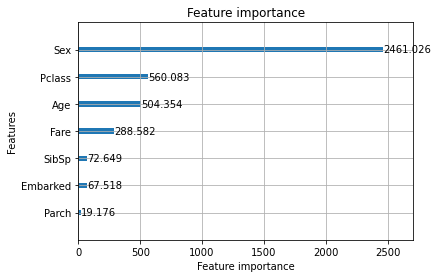

In [19]:
lgb.plot_importance(gbm, importance_type = 'gain')

In [8]:
pred_y = gbm.predict(test_x)
roc_auc_score(test_y, pred_y)

0.8397836038285476

In [9]:
explainer = shap.TreeExplainer(gbm)
shap_matrix = explainer.shap_values(x)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [10]:
def get_2d_mat_shape(mat):
    return len(mat), len(mat[0])

In [11]:
get_2d_mat_shape(shap_matrix)

(2, 713)

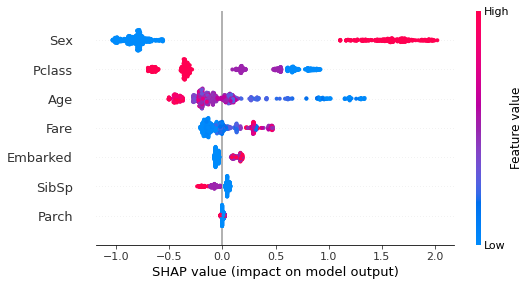

In [12]:
shap.summary_plot(shap_values=shap_matrix[1],
                 features=x,
                 feature_names=x.columns.tolist())

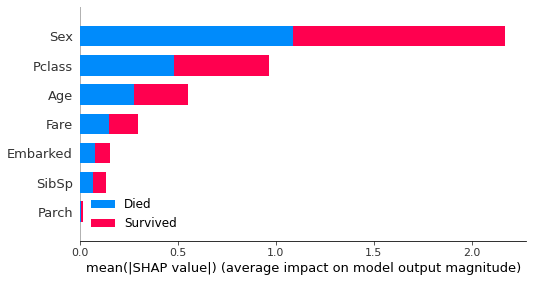

In [13]:
shap.summary_plot(shap_values = shap_matrix,features = x, feature_names=x.columns.tolist(),  plot_type='bar', class_names=['Died', 'Survived'])

In [14]:
shap_matrix[1][4, :]

array([ 0.65657281, -0.86987475, -0.42675998,  0.02681235, -0.00258764,
        0.1653953 , -0.03310845])

In [15]:
y[4]

0

In [16]:
pred_y[4]

0.36817935261238766

In [17]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [18]:
x.iloc[4]

Pclass       1.0000
Sex          0.0000
Age         54.0000
SibSp        0.0000
Parch        0.0000
Fare        51.8625
Embarked     0.0000
Name: 4, dtype: float64